In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('/content/credit_card_clean.csv')

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#1.

We scale features to ensure variables are not disproportinally affecting the model's performance in its handling of data. This can be due to model requirements or differen units or scales the variable are in. In this case variables are already on the same scale and units, so we do not need to do additional scaling.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [54]:
#2


# Convert 'default', 'sex', 'marriage', 'education' to categorical variables
for column in ['DEFAULT', 'SEX', 'MARRIAGE', 'EDUCATION']:
  df[column] = df[column].astype('category')

In [55]:
#3

# Define the target variable
target_variable = 'DEFAULT'

# Calculate the proportions of default vs. non-default
default_proportion = df[target_variable].value_counts(normalize=True)

print(default_proportion)


DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64


The prediction variable is fairly imbalanced leaning strongly towards the negative class.

In [56]:
#4

# Create dummy variables for 'EDUCATION' and 'MARRIAGE', 'SEX'
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True, dtype=int)

# Print the number of features (columns) in the DataFrame
print("Number of features after creating dummy variables:", df.shape[1])

Number of features after creating dummy variables: 28


In [57]:
#5

# Define the feature space (X) and target variable (y)
X = df.drop('DEFAULT', axis=1)
y = df['DEFAULT']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


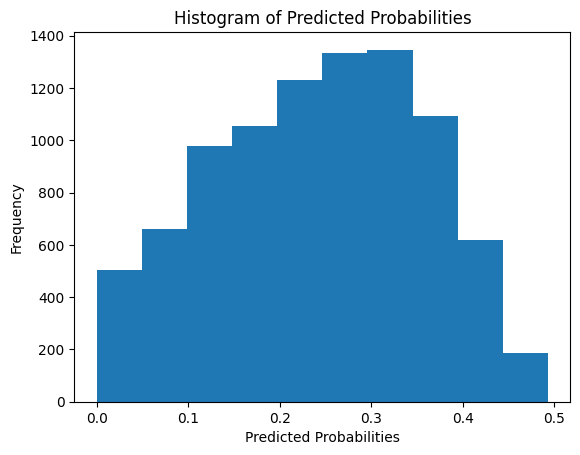

In [58]:
#6

from sklearn.linear_model import LogisticRegression


#threshold = 0.8

# Train the logistic regression model with default parameters
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate predicted probabilities and classifications
y_hat_probs = model.predict_proba(X_test)[:, 1]
y_hat = model.predict(X_test)


# Plot the histogram of y_hat_probs
plt.hist(y_hat_probs, bins=10)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()




A higher threshold results in less captured positive cases. The model has to reach a higher criteria to produce a positive classification, so the result is less positive cases bieng classified and more negative classes being classified. Recall tells us the models ability to accurately predict positive cases. This would be helpful in our context ebcause our positive class has far less observations and is the class we care more to predict.

In [59]:
#7

# Generate predicted classifications for 30% threshold
y_hat_30 = (y_hat_probs >= 0.3).astype(int)

# Generate predicted classifications for 60% threshold
y_hat_60 = (y_hat_probs >= 0.6).astype(int)

from sklearn.metrics import recall_score

recall_30 = recall_score(y_test, y_hat_30)
recall_60 = recall_score(y_test, y_hat_60)

print(f"Recall at 30% threshold: {recall_30:.4f}")
print(f"Recall at 60% threshold: {recall_60:.4f}")

# Construct a DataFrame named df_predictions with the specified columns
df_predictions = pd.DataFrame({
    'y_test': y_test,
    'y_hat': y_hat,
    'y_hat_probs': y_hat_probs,
    'y_hat_30': y_hat_30,
    'y_hat_60': y_hat_60,
})

print(df_predictions.head())

Recall at 30% threshold: 0.4985
Recall at 60% threshold: 0.0000
      y_test  y_hat  y_hat_probs  y_hat_30  y_hat_60
2308       0      0     0.443004         1         0
22404      0      0     0.218442         0         0
23397      0      0     0.308618         1         0
25058      0      0     0.203665         0         0
2664       1      0     0.317187         1         0


We would use a the threshold of 0.30 becuase it would allow the mdoel to make positive predictions where as a threshold of 0.60 does not. The inability to classify a positive prediction would imply false negatives will inevitable be made.

In [60]:
#7
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef


def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty=None, class_weight=None):

    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])

    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled

my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)


my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
MCC       = 0.0
-----------------------------------------
-----------------------------------------
Accuracy  = 0.65
Precision = 0.31
Recall    = 0.5
f1_score  = 0.39
MCC       = 0.17
-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predict : negative,Predict :positive
Actual : negative,4903,2137
Actual : positive,979,981


For a threshold value of 0.5, the accuracy makes sense. The majority class is the negaitive one and if tis predicting correctly for that class then this is the result with a higher threshold. The higher threshold results in the model's inability capture the true relationship with the positive class meaning any metric involving it will be off such as precision, F1 score, MCC, recall.

The threshold value of 0.3 aligns with the previous model constructed above. As we expected the model will be able to capture true positives partially, which is why the accuracy and other metrics are still low, but increased compared to the threshold value of 0.5(recall, precision, MCC, F1). Decreasing the threshold would help classify positive cases in general.

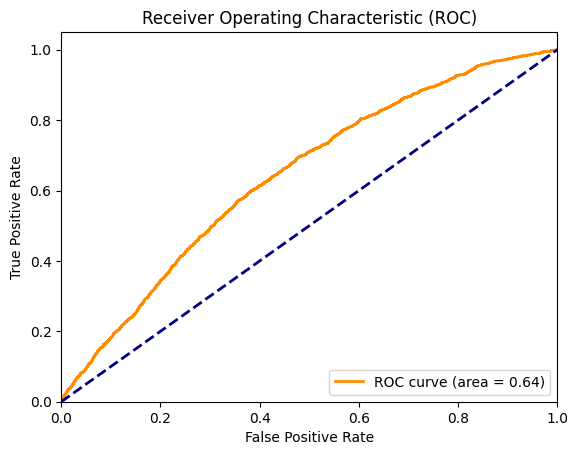

In [61]:
#8

from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



Yes, its is perfforming better than random skill. The AUC area is 0.64 which is greater than the 0.5 value of a baseline, random guess.

In [62]:
#9

from sklearn.model_selection import cross_val_score

# K-Fold Cross Validation with K=5
model_CV5 = LogisticRegression()
cv_scores_CV5 = cross_val_score(model_CV5, X, y, cv=5, scoring='accuracy')
accuracy_CV5 = np.mean(cv_scores_CV5)


# K-Fold Cross Validation with K=10
model_CV10 = LogisticRegression()
cv_scores_CV10 = cross_val_score(model_CV10, X, y, cv=10, scoring='accuracy')
accuracy_CV10 = np.mean(cv_scores_CV10)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [63]:
print(f"Accuracy with 5-Fold Cross Validation: {accuracy_CV5:.5f}")
print(f"Accuracy with 10-Fold Cross Validation: {accuracy_CV10:.5f}")

Accuracy with 5-Fold Cross Validation: 0.77883
Accuracy with 10-Fold Cross Validation: 0.77880


The model is doing generally well on new data regardless of how its training sets are split which is indictive the mdoel is not overfitting. This reasoning would explain why 7.1 saw similar accuracy results.